# Non-overlapping joins

>When geographic datasets do not touch but have a strong geographic relationship
>
>cycle_hire and cycle_hire_osm seem closely related but do not touch

In [5]:
import geopandas as gpd 
%matplotlib inline 
import matplotlib.pyplot as plt
from helpers import cycle_hire, cycle_hire_osm

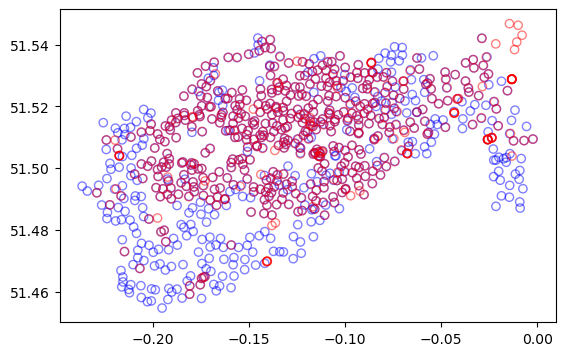

In [6]:
ax = cycle_hire.plot(edgecolor='b', color='none', alpha=0.5)
cycle_hire_osm.plot(ax=ax, edgecolor='r', color='none', alpha=0.5);

>Check if any points are the same

In [7]:
m = cycle_hire.geometry.apply(
    lambda x: cycle_hire_osm.geometry.intersects(x)
)
m.to_numpy().any()

False

>Since the geometries do not overlap, in order to merge must create buffers
>
>Ensure appropriate crs for meter calculations

In [8]:
crs = 27700 
cycle_hire_buffers = cycle_hire.copy().to_crs(crs)
cycle_hire_buffers.geometry = cycle_hire_buffers.buffer(20)
cycle_hire_buffers = gpd.sjoin(
    cycle_hire_buffers, cycle_hire_osm.to_crs(crs), 
    how='left'
)
print(cycle_hire_buffers)

      id           name_left  ... cyclestreets_id  description
0      1        River Street  ...            None         None
1      2  Phillimore Gardens  ...            None         None
2      3  Christopher Street  ...            None         None
3      4   St. Chad's Street  ...            None         None
4      5      Sedding Street  ...             NaN          NaN
..   ...                 ...  ...             ...          ...
737  773       Tallis Street  ...            None         None
738  774     Hurlingham Park  ...             NaN          NaN
739  775  Little Brook Green  ...             NaN          NaN
740  776     Abyssinia Close  ...             NaN          NaN
741  777        Limburg Road  ...             NaN          NaN

[762 rows x 12 columns]


>There are too many rows because some stations have myultiple matches. For these we need to aggregate the values and return the mean

In [13]:
cycle_hire_buffers = (cycle_hire_buffers[['id', 'capacity', 'geometry']]
    .dissolve(by='id', aggfunc='mean')
    .reset_index())
cycle_hire_buffers.geometry = cycle_hire_buffers.centroid 
print(cycle_hire_buffers)

      id                       geometry  capacity
0      1  POINT (531203.517 182832.066)       9.0
1      2  POINT (525208.067 179391.922)      27.0
2      3  POINT (532985.807 182001.572)       NaN
3      4  POINT (530437.757 182912.038)       NaN
4      5  POINT (528050.966 178742.004)       NaN
..   ...                            ...       ...
737  773   POINT (531435.032 180916.01)      14.0
738  774  POINT (524798.028 176102.023)       NaN
739  775  POINT (523391.016 179020.043)       NaN
740  776  POINT (527437.473 175077.168)       NaN
741  777      POINT (527553.301 175257)       NaN

[742 rows x 3 columns]


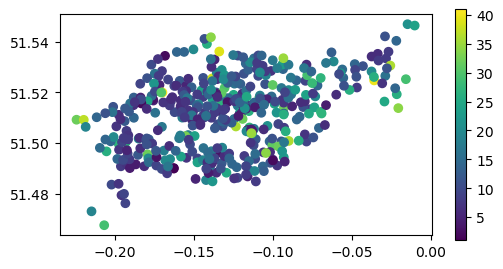

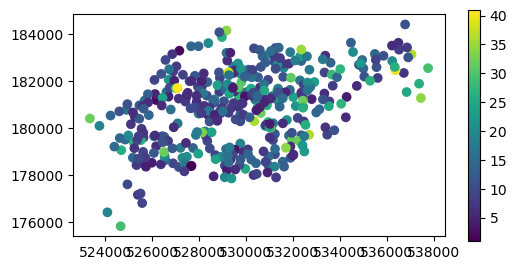

In [18]:
# Input
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
cycle_hire_osm.plot(column='capacity', legend=True, ax=ax);
# Join result
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
cycle_hire_buffers.plot(column='capacity', legend=True, ax=ax);